# Soft Clustering

Clustering is a process of dividing observations into multiple buckets. Soft clustering can assign multiple labels for each observation. Below are the few soft clustering menthods:

1. Gaussian Mixture Models using Expectation-Maximization
2. Fuzzy C-Means
3. Latent Dirichlet Allocation (LDA)


## Gaussian Mixture Models

* GMM assumes the observations are generated from a mixture of finite number of Gaussian distributions with unknown parameters. 


* To cluster the observations we do reverse engineering and identify the probabilities of each Gaussian distribution for a given observation. 

From Bayes theorem:

$$P(k\mid x_i) = \frac{P(x_i \mid k) P(k)}{\sum_{k}P(x_i \mid k) P(k)} \ \forall \ k \in K$$

Where, $x_i \sim N(\mu_k, \Sigma_k)$ ; $P(x_i \mid k) = N(x_i \mid \mu_k, \Sigma_k)$ ; $P(k)$ is the proportion of observations in cluster `k`


**Model Parameters:** $\pi_k = P(k)$ (Say) ; $\mu_k$ and $\Sigma_k$

**Hyper parameters:** Number of clusters (size of `K`)

There are different ways to learn model parameters, we will talk about EM (Expectation-Maximization) algorithm in this tutorial.


#### EM Algorithm to Maximize Likelihood

**Objective:** 

$$Maximize \ L = \sum_i P(x_i \mid \pi, \mu, \Sigma)$$

**Inputs:** 

$$x_1, x_2, x_3 .... x_n \ \forall \ x_i \in R^d$$

Initialize $\pi$; $\mu$ and $\Sigma$

**E-Step:** Compute $P(k \mid x_i) \ \forall \ i, k$ as follows

$$P(k \mid x_i) = \frac{\pi_k P(x_i \mid \mu_k, \Sigma_k)}{\sum_j \pi_k P(x_i \mid \mu_k, \Sigma_k)} \ \forall \ i = 1,2,3 ... n ; k \in K$$

**M-Step:**

Let us define $n_k = \sum_i P(k \mid x_i) \ \forall \ k \in K$

Update model parameters as follow:

$$\pi_k = \frac{n_k}{n} \ \forall \ k \in K$$
$$\mu_k = \frac{1}{n_k}\sum_i P(k \mid x_i)x_i \ \forall k \in K$$
$$\Sigma_k = \frac{1}{n_k}\sum_i P(k \mid x_i) (x_i - \mu_k)^T(x_i - \mu_k) \ \forall \ k \in K$$

Repeat E and M steps until consecutive difference between `L` is very minimum


### Usign GMM on simulated data

In [66]:
# Generating sample data
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]
X[:5]

array([[ 6.48826703,  0.25006446],
       [ 2.52194722, -2.69798647],
       [ 3.06877291, -2.90007604],
       [ 4.31427482,  0.70295058],
       [ 2.38449945, -2.53563494]])

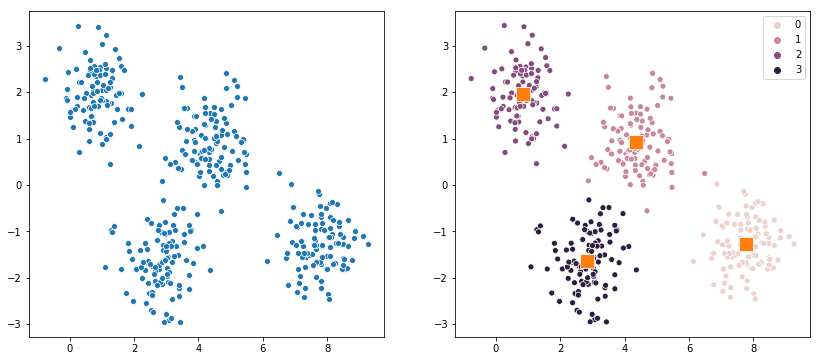

In [67]:
# Using GMM to cluster observations
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
%matplotlib inline

gmm = GaussianMixture(n_components=4).fit(X) # Where n_components is number of clusters
labels = gmm.predict(X)

f, axes = plt.subplots(1, 2, figsize=(14,6))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=labels)
scatter(gmm.means_[:,0], gmm.means_[:,1], ax=axes[1],marker="s",s=200)
plt.show()


In [68]:
# Probabilities of each observation across Gaussian models
probs = gmm.predict_proba(X)
print(probs[:10].round(3))

[[0.463 0.537 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.987 0.    0.013]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


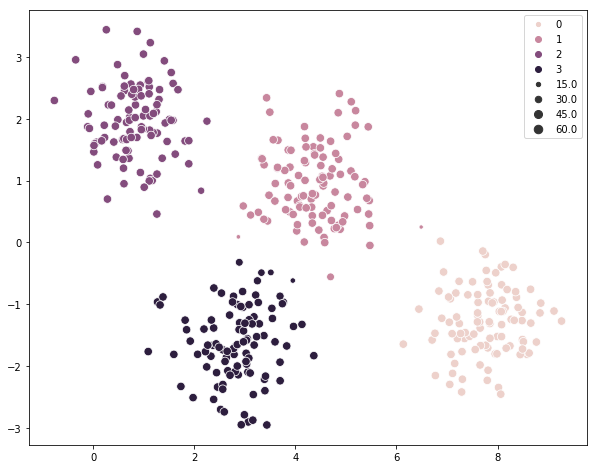

In [69]:
# Visualizing the certainity (size of the bubble proportional to certainity of it's prediction)
size = 50 * probs.max(1) ** 2
f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(X[:, 0], X[:, 1], hue=labels, size=size)


### Using GMM on Wine Quality data

In [70]:
import pandas as pd
import numpy as np

white_wine = pd.read_csv('Wine Quality/winequality-white.csv', sep = ';')
white_wine['type'] = 1
red_wine = pd.read_csv('Wine Quality/winequality-red.csv', sep = ';')
red_wine['type'] = 0
wine_df = pd.concat([white_wine, red_wine], axis = 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### Fitting GMM and compare type of wine with cluster labels

In [71]:
gmm_wine = GaussianMixture(n_components=2).fit(wine_df.drop(['type'], axis = 1))
labels = gmm_wine.predict(wine_df.drop(['type'], axis = 1))
wine_df['labels'] = labels
pd.crosstab(wine_df.type, wine_df.labels)

labels,0,1
type,,
0,14,1585
1,4574,324


Interesting thing to notice here is, `Type = 0` indicates `Red wine` and all of the Red wine observations clustered into one group. Similary `white wine` observations. 

### Visualize the clusters after PCA

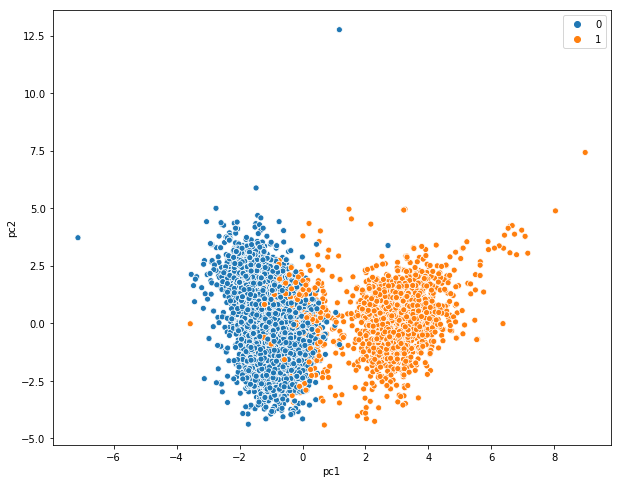

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

white_wine_scale = StandardScaler().fit_transform(wine_df.drop(['labels'], axis = 1))

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(white_wine_scale)

prin_comp = pd.DataFrame(principalComponents, columns= ['pc1', 'pc2'] )

f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(prin_comp.iloc[:, 0], prin_comp.iloc[:, 1], hue=labels)

***

## Fuzzy C-Means

Fuzzy c-means assigns membership value for each data point in each cluster.

**Objective:**

$$J = Minimize \ \sum_{j \in K} \sum_{x_i \in C_j} u_{ij}^{m} \lVert x_i - \mu_j \rVert^2$$

Where, $u_{ij}$ is the membership of $i^{th}$ data point with $j^{th}$ cluster; $\mu_j$ is the $j^{th}$ cluster centroid and `m` is the fuzzifier $1 < m < \infty$

**Model Parameters:**  $u_{ij} \ \forall \ i = 1,2,3 ... n ; j \in K$

**Hyper parameters:** 

* `m` Fuzziness of the model will increase exponentially with the value of `m`

* Number of clusters (K)


**Algorithm:**

* Choose number of clusters


* Initialize cluster centroids $\mu_j \ \forall j \in K$ and $u_{ij} \ \forall \ i = 1,2,3 ... n ; j \in K$


Repeat

   1. Compute the centroid for each cluster as follows
    
$$\mu_j = \frac{\sum_{x_i \in C_j}u_{ij}^{m}x_i}{\sum_{x_i \in C_j}u_{ij}^{m}} \ \forall \ j = 1,2,3 ... K$$

   Here, $\mu_j$ is the weighted average of $x_i$ s with $u_{ij}^{m}$ as the weights

   2. Compute membership of each data point with respect to new cluster centroids

$$u_{ij} = \frac{1}{\sum_{j = 1}^k \Big(\frac{\lVert x_i - \mu_j \rVert}{\lVert x_i - \mu_k \rVert}\Big)^{\frac{2}{m-1}}} \ \forall \ i = 1,2,3 ... n ; j = 1,2,3 ... K$$



Until the improvement in `J` saturates 



**$u_{ij}$ explanation:**

$\frac{\lVert x_i - \mu_j \rVert}{\lVert x_i - \mu_k \rVert}$ will converge to zero is $i^{th}$ data point is close to $j^{th}$ cluster than any other cluster and hence $u_{ij}$ converge to $\infty$

**Importance of `m`:**

Choose `m` close to 1 then power converge to $\infty$ and $u_{ij}$ converge to 0 for all $x_i \ne \mu_j$. Meaning, membership vlaue of 1 assigns to data point only if it is at the cenroid of the cluster. Otherwise membership value will be 0.

Choose `m` very large positive number then power converge to 0 and $u_{ij}$ converge to 1 for all $x_i$. Meaning, membership vlaue of 1 assigns to all data points for all clusters.

Hence, `m` controls the fuzziness of the model.



### Using Fuzzy C-Means on simulated data

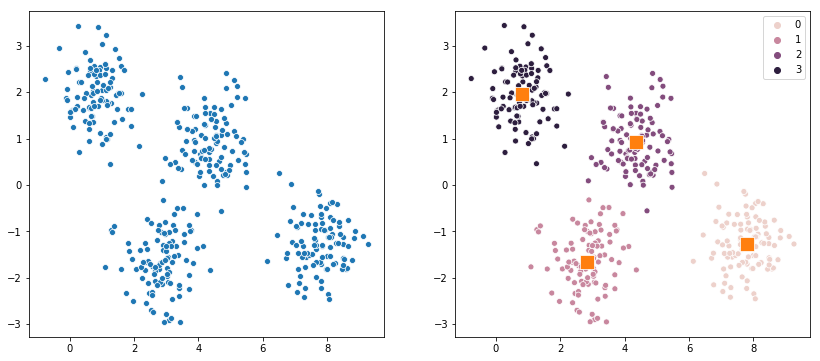

In [73]:
from fcmeans import FCM

# fit the fuzzy-c-means
fcm = FCM(n_clusters=4)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
f, axes = plt.subplots(1, 2, figsize=(14,6))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

### Using Fuzzy C-Means on wine quality data

In [74]:
fcm_wine = FCM(n_clusters=2).fit(wine_df.drop(['type'], axis=1))
fcm_labels_wine = fcm_wine.u.argmax(axis=1)
fcm_wine_centers = fcm_wine.centers
wine_df['labels_fcm'] = fcm_labels_wine
pd.crosstab(wine_df.type, wine_df.labels_fcm)

labels_fcm,0,1
type,,
0,1516,83
1,1310,3588


### Visualize the clusters after PCA

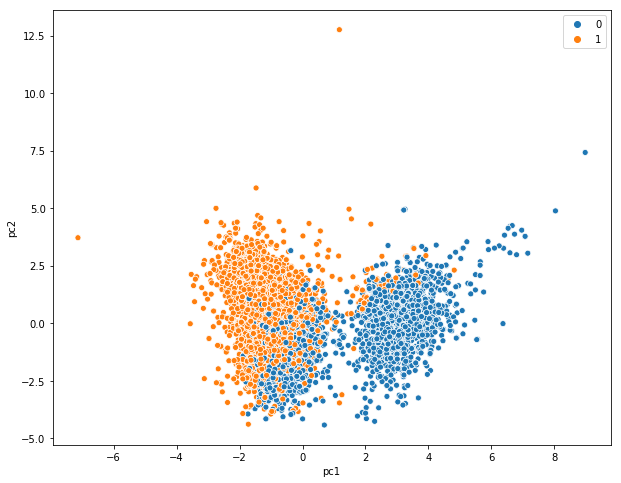

In [75]:
f, axes = plt.subplots(1, 1, figsize=(10,8))
scatter(prin_comp.iloc[:, 0], prin_comp.iloc[:, 1], hue=fcm_labels_wine)

***

## Latent Dirichlet Allocation (LDA)

So far we have discussed soft clustering on tabular data. Now we will discuss about soft clustering on text data, this is also called as topic modelling.

`LDA` assumes that documents are created as below:

* You have given `K` labelled boxes with topic names as label and there are different number of words within each box

* To create a document of `N` words, you have to randomly select a box and a word within that box and keep it in your document 

Now we have documents with us but not sure how they created. Objective is to find `latent` topics, which represents document.

Below diagram explains how LDA works


![image](lda_image.png)

Where, 

**Input parameters:**

* `M` is the number of documents (also called as size of the corpus)

* `N` is the number of words in each document

* `k` is the total number of topics

* `w` is a word in document

* `z` is a topic from a set of topics

* `V` is the size of the vocabulary (Vocabulary is a collection of words from all documents)

**Note:** Topic is a collection words with weights

**Model Parameters:**

* $\alpha$ is the topic distribution for each document, $M X k$ matrix of probabilities

* $\eta$ is the word distribution for each topic, $k X V$ matrix of probabilities

* $[\theta_{ij}]$ is the probability of $i^{th}$ document containing words from $j^{th}$ topic, $M X k$ matrix

* $[\beta_{ij}]$ is the probability of $i^{th}$ topic containing $j^{th}$ word, $k X V$ matrix

Where, $\theta, \beta \sim Dirichlet \ Distribution$


### Using LDA on news headlines data

In [76]:
news_headlines = pd.read_csv('abcnews-date-text.csv')
news_headlines = news_headlines[news_headlines['publish_date'] > 20150000].reset_index(drop=True)
news_headlines.head()

,publish_date,headline_text
0,20150101,1000s celebrate nye in adelaide
1,20150101,1984 qld cabinet papers released
2,20150101,2014 year in interactive storytelling
3,20150101,35 dead in shanghai new year stampede
4,20150101,airasia qz8501 first two bodies arrive in sura...


In [77]:
data_text = news_headlines[['headline_text']]
data_text['index'] = data_text.index
documents = data_text

In [78]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
stemmer = SnowballStemmer("english")

#### Text pre-processing

In [79]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [80]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['mackay', 'weather', 'station', 'to', 'be', 'upgraded']


 tokenized and lemmatized document: 
['mackay', 'weather', 'station', 'upgrad']


In [81]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0                                   [celebr, adelaid]
1                            [cabinet, paper, releas]
2                          [year, interact, storytel]
3                     [dead, shanghai, year, stamped]
4                    [airasia, bodi, arriv, surabaya]
5         [airasia, offici, say, black, search, week]
6               [alcohol, produc, talk, nativ, plant]
7                        [leagu, live, stream, updat]
8    [argentina, presid, announc, dog, allow, flight]
9          [asian, volunt, provid, home, grind, help]
Name: headline_text, dtype: object

#### Bag-of-words

In [82]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 adelaid
1 celebr
2 cabinet
3 paper
4 releas
5 interact
6 storytel
7 year
8 dead
9 shanghai
10 stamped


In [83]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [84]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(468, 1), (912, 1), (1451, 1), (2919, 1)]

In [85]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 468 ("station") appears 1 time.
Word 912 ("weather") appears 1 time.
Word 1451 ("upgrad") appears 1 time.
Word 2919 ("mackay") appears 1 time.


#### LDA on bag-of-words

In [86]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [87]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*"centr" + 0.011*"farmer" + 0.010*"box" + 0.009*"sport" + 0.009*"marriag" + 0.009*"histori" + 0.008*"play" + 0.008*"say" + 0.007*"grand" + 0.007*"island"
Topic: 1 
Words: 0.046*"australia" + 0.026*"north" + 0.018*"coast" + 0.016*"south" + 0.015*"korea" + 0.014*"test" + 0.014*"work" + 0.011*"power" + 0.011*"worker" + 0.011*"gold"
Topic: 2 
Words: 0.056*"trump" + 0.024*"world" + 0.019*"christma" + 0.017*"nation" + 0.013*"australian" + 0.012*"win" + 0.012*"open" + 0.011*"news" + 0.008*"hit" + 0.008*"women"
Topic: 3 
Words: 0.025*"polic" + 0.021*"charg" + 0.019*"court" + 0.017*"murder" + 0.017*"death" + 0.017*"attack" + 0.017*"crash" + 0.016*"die" + 0.015*"woman" + 0.014*"kill"
Topic: 4 
Words: 0.018*"drug" + 0.018*"govern" + 0.017*"market" + 0.013*"share" + 0.011*"australian" + 0.010*"question" + 0.009*"million" + 0.008*"polic" + 0.008*"terror" + 0.008*"citizenship"
Topic: 5 
Words: 0.020*"elect" + 0.016*"state" + 0.015*"indigen" + 0.011*"victoria" + 0.011*"miss" + 0

**References:**

* https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/

* https://scikit-learn.org/stable/modules/mixture.html

* https://en.wikipedia.org/wiki/Fuzzy_clustering

* http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

* https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24